In [163]:
print("to jest pierwszy notebook")
a = 6

to jest pierwszy notebook


In [164]:
c = a*5
c

30

# <span style="font-size:14pt;">To jest pierwszy model - **SVM** (<span style="color:red; font-family:Georgia">Wektory maszyny nośnej</span>)</span>

In [165]:
lsztuk = 12

In [166]:
price = "53.2"

In [17]:
lsztuk*float(price)

# <span style="font-size:14pt;">Model klasyfikatora SVM</span>

In [167]:
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

In [168]:
digits = datasets.load_digits()

In [169]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

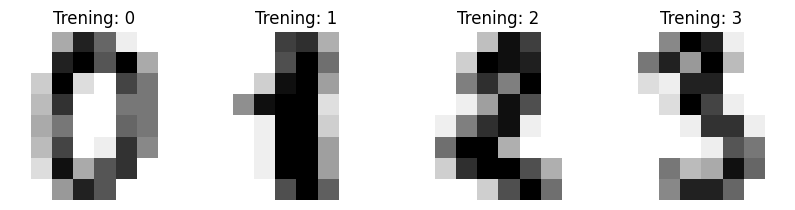

In [170]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Trening: {label}")

In [171]:
n_samples = len(digits.images)
n_samples

1797

In [172]:
#utworzenie modelu klasyfikatora SVC (SVM)
clf = svm.SVC(gamma=0.001,C=1)

In [173]:
datasets = digits.images.reshape((n_samples,-1))

In [174]:
X_train, X_test, y_train, y_test = train_test_split(datasets,digits.target,test_size=0.5,shuffle=False)

In [175]:
clf.fit(X_train,y_train)

SVC(C=1, gamma=0.001) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC ? Documentation for SVC i Fitted SVC(C=1, gamma=0.001)

In [176]:
predicted = clf.predict(X_test)

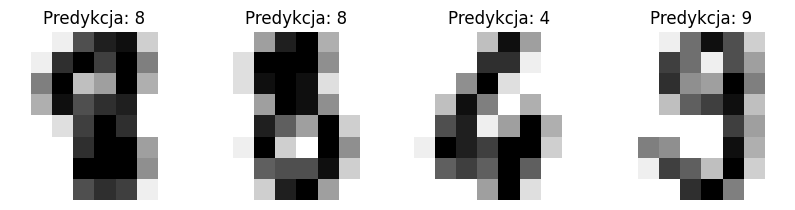

In [177]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title(f"Predykcja: {prediction}")

In [178]:
#ocena modelu
print(f"raport klasyfikcji dla klasyfikatora {clf}\n{metrics.classification_report(y_test,predicted)}\n")

raport klasyfikcji dla klasyfikatora SVC(C=1, gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Maierz pomyłek')

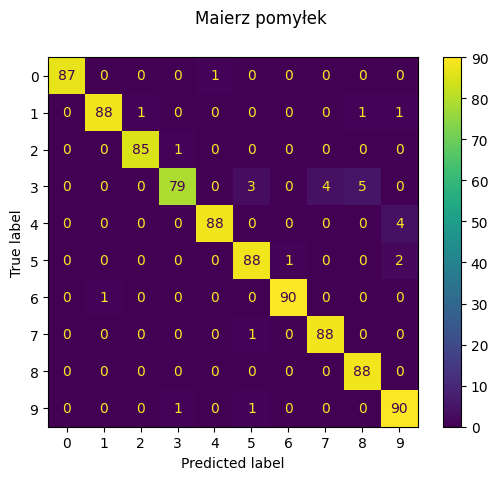

In [179]:
#macierz pomyłek
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Maierz pomyłek")